<a href="https://colab.research.google.com/github/Yael0706/IA-ACTIVITIES/blob/main/Assignment_6_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load libraries.

In [10]:
#assigmen 6-Artificial Neural Network: feedforward.
#Edgar Yael Moreno Garcia
#id: 2021283
#Tuesday N4
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import random

Load data.

In [11]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


Data preprocessing.

In [12]:
train_data = train_data / 255.0
test_data = test_data / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

Model selection and training.

In [13]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8664 - loss: 0.4714 - val_accuracy: 0.9600 - val_loss: 0.1351
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9638 - loss: 0.1216 - val_accuracy: 0.9665 - val_loss: 0.1164
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9771 - loss: 0.0746 - val_accuracy: 0.9717 - val_loss: 0.0982
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9832 - loss: 0.0550 - val_accuracy: 0.9733 - val_loss: 0.0901
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9876 - loss: 0.0412 - val_accuracy: 0.9729 - val_loss: 0.0938
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9890 - loss: 0.0330 - val_accuracy: 0.9747 - val_loss: 0.0938
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9918 - loss: 0.0253 - val_accuracy: 0.9722 - val_loss: 0.1038
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9937 - loss: 0.0203 - 

Model testing.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.1093
Model accuracy on test set: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


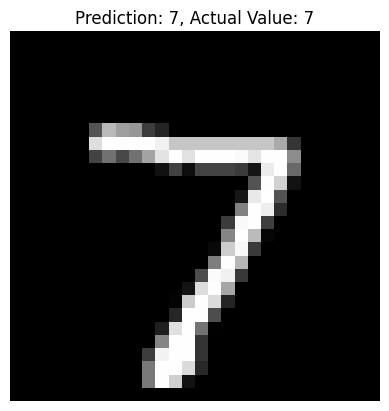

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


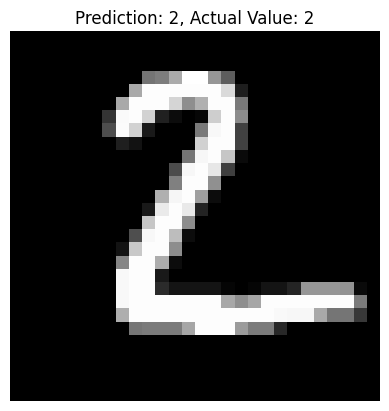

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


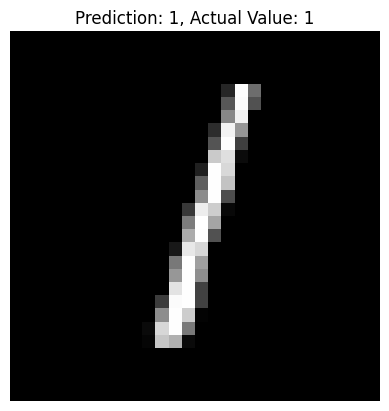

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


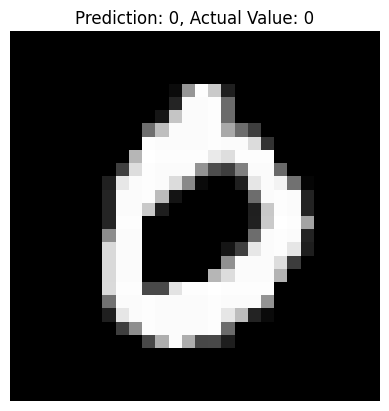

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


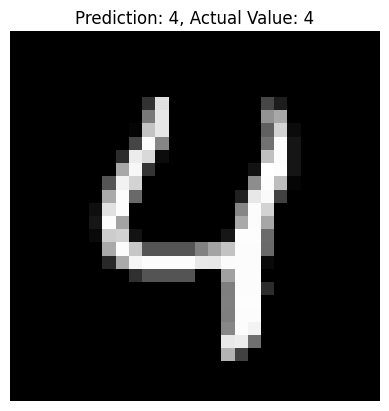

In [17]:
# Evaluate the model with test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Model accuracy on test set: {test_accuracy:.2f}')

# Perform 5 predictions and compare with the actual value
for i in range(5):
    img = test_data[i]
    actual_label = np.argmax(test_labels[i])
    prediction = np.argmax(model.predict(np.expand_dims(img, axis=0)))

    # Display prediction results
    plt.imshow(img, cmap='gray')
    plt.title(f'Prediction: {prediction}, Actual Value: {actual_label}')
    plt.axis('off')
    plt.show()
